
1. Business Problem
1.1 Problem Context

Our client is an online retailer based in the UK. They sell all-occasion gifts, and many of their customers are wholesalers.

    Most of their customers are from the UK, but they have a small percent of customers from other countries.
    They want to create groups of these international customers based on their previous purchase patterns.
    Their goal is to provide more tailored services and improve the way they market to these international customers.

1.2 Problems with current approach

Currently, the retailer simply groups their international customers by country. As you'll see in the project, this is quite inefficient because:

    There's a large number of countries (which kind of defeats the purpose of creating groups).
    Some countries have very few customers.
    This approach treats large and small customers the same, regardless of their purchase patterns.

1.3 Problem Statement

The retailer has hired us to help them create customer clusters, a.k.a "customer segments" through a data-driven approach.

    They've provided us a dataset of past purchase data at the transaction level.
    Our task is to build a clustering model using that dataset.
    Our clustering model should factor in both aggregate sales patterns and specific items purchased.

1.4 Business Objectives and constraints
2. Machine Learning Problem
2.1 Data Overview

For this project:

    The dataset has 35116 observations for previous international transactions.
    The observations span 37 different countries.
    Note: There is no target variable.

We have the following features:

Invoice information

    'InvoiceNo' – Unique ID for invoice
    'InvoiceDate' – Invoice date

Item information

    'StockCode' – Unique ID for item
    'Description' – Text description for item
    'Quantity' – Units per pack for item
    'UnitPrice' – Price per unit in GBP

Customer information

    'CustomerID' – Unique ID for customer
    'Country' – Country of customer

2.2 Mapping Buisness problem to ML problem
2.2.1 Type of ML Problem

It is an unsupervised learning task, where given the features about each transaction, we need to segment the customers based on their buying patterns.

    It is importnat to note that the given data is transaction-level while the clusters (or segmenst) we need to create are customer-level.



In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("customer.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [2]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [3]:
# .DataFrame.index - To get the index(row labels) of the dataframe.

x = df.index
print(x)

RangeIndex(start=0, stop=35116, step=1)


In [4]:
# Total no. of elements

df.size

280928

In [5]:
# Total no's of rows and columns

df.shape

(35116, 8)

In [6]:
# Checking data type of each column
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# Count of unique data types

df.dtypes.value_counts()

object     4
int64      2
float64    2
Name: count, dtype: int64

In [8]:
# Selecting data based on data types
df.select_dtypes(include=[int])

,InvoiceNo,Quantity
0,536370,24
1,536370,24
2,536370,12
3,536370,12
4,536370,24
...,...,...
35111,581587,12
35112,581587,6
35113,581587,4
35114,581587,4


In [9]:
df.select_dtypes(exclude=[int])

,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country
0,22728,ALARM CLOCK BAKELIKE PINK,12/1/10 8:45,3.75,12583.0,France
1,22727,ALARM CLOCK BAKELIKE RED,12/1/10 8:45,3.75,12583.0,France
2,22726,ALARM CLOCK BAKELIKE GREEN,12/1/10 8:45,3.75,12583.0,France
3,21724,PANDA AND BUNNIES STICKER SHEET,12/1/10 8:45,0.85,12583.0,France
4,21883,STARS GIFT TAPE,12/1/10 8:45,0.65,12583.0,France
...,...,...,...,...,...,...
35111,22613,PACK OF 20 SPACEBOY NAPKINS,12/9/11 12:50,0.85,12680.0,France
35112,22899,CHILDREN'S APRON DOLLY GIRL,12/9/11 12:50,2.10,12680.0,France
35113,23254,CHILDRENS CUTLERY DOLLY GIRL,12/9/11 12:50,4.15,12680.0,France
35114,23255,CHILDRENS CUTLERY CIRCUS PARADE,12/9/11 12:50,4.15,12680.0,France


In [10]:
# Concise summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35116 entries, 0 to 35115
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35116 non-null  int64  
 1   StockCode    35116 non-null  object 
 2   Description  35116 non-null  object 
 3   Quantity     35116 non-null  int64  
 4   InvoiceDate  35116 non-null  object 
 5   UnitPrice    35116 non-null  float64
 6   CustomerID   33698 non-null  float64
 7   Country      35116 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.1+ MB


In [11]:
# Counting the missing values
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [12]:
# Only keeping the transactions with CustomerID's
df = df[df.CustomerID.notnull()]

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
# I'm converting CustomerID datatype object into int64 datatype
# the changes should reflect on that column only.

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


df['CustomerID'] = df['CustomerID'].astype('int64')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France
...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='count', ylabel='Country'>

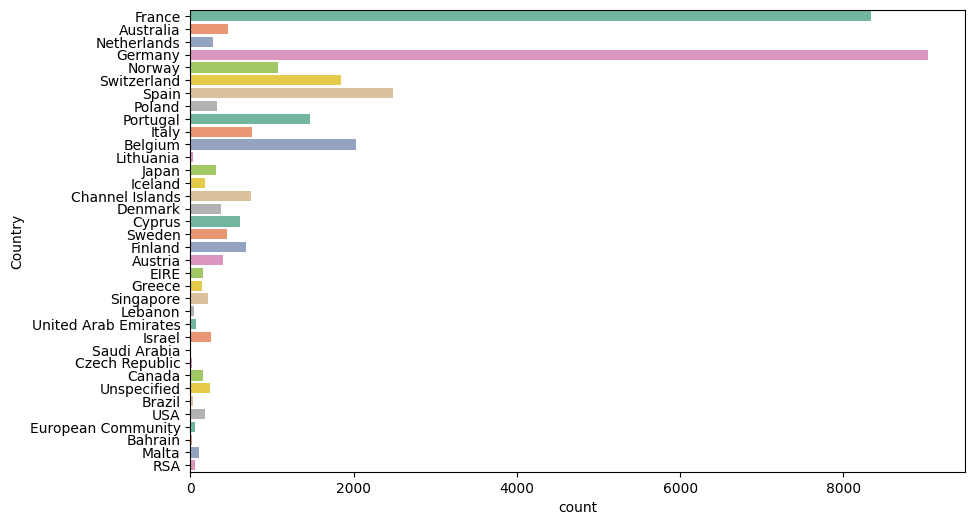

In [17]:
# Displaying the distribution of transcations by country

plt.figure(figsize=(10,6))

# Bar Plot
sns.countplot(y = 'Country', data = df, palette = 'Set2')

In [18]:
# Creating new dataframe as 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice


df.Sales.head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

<b> Now i am saving new dataframe as cleaned tanscation </b>

In [19]:
#df.to_csv('cleaned_transactions.csv', index=None)


# Customer-level feature engineering

Now that I have a cleaned transaction-level dataset, it's time to roll it up (aggregate up) to the customer level, which i feed into my machine learning algorithms later.

I want 1 customer per row, and I want the features to represent information such as:

  <li> Number of unique purchases by the customer</li>
  <li> Average cart value for the customer</li>
   <li> Total sales for the customer</li>
    Etc.

To do so, I will use two tools:

    <li>groupby() to roll up by customer.</li>
    <li>agg() to engineer aggregated features.</li>

Aggegrate invoice data by customer. & engineer 1 feature:

    'total_transactions' - the total number of unique transactions for each customer.


In [20]:
# Aggegrating invoice data

# Group the DataFrame by 'CustomerID'
# For each customer group, calculate the number of unique 'InvoiceNo' values
# Rename the resulting column to 'total_transactions'
invoice_data = df.groupby('CustomerID').agg(total_transactions=('InvoiceNo', 'nunique'))

invoice_data.head(10)


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1
12356,3


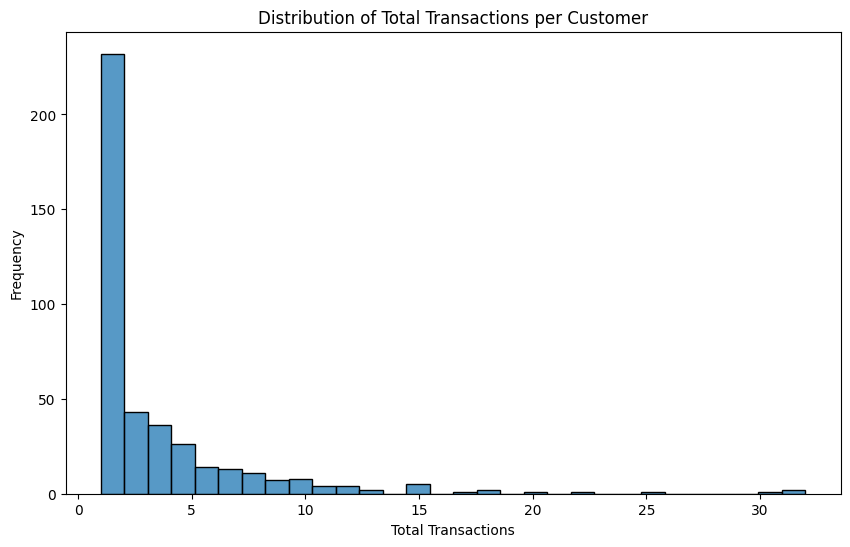

In [21]:
# Ploting a histogram of the 'total_transactions' to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(invoice_data['total_transactions'], bins=30, kde=False)
plt.title('Distribution of Total Transactions per Customer')
plt.xlabel('Total Transactions')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Group the DataFrame by 'CustomerID'
# Calculate the total number of 'StockCode' (products) for each customer
# Also, calculate the number of unique 'StockCode' (products) for each customer
product_data = df.groupby('CustomerID').agg(
    total_products=('StockCode', 'count'), 
    total_unique_products=('StockCode', 'nunique')
)

product_data.head(10)

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59
12353,4,4
12354,58,58
12355,13,13
12356,59,53


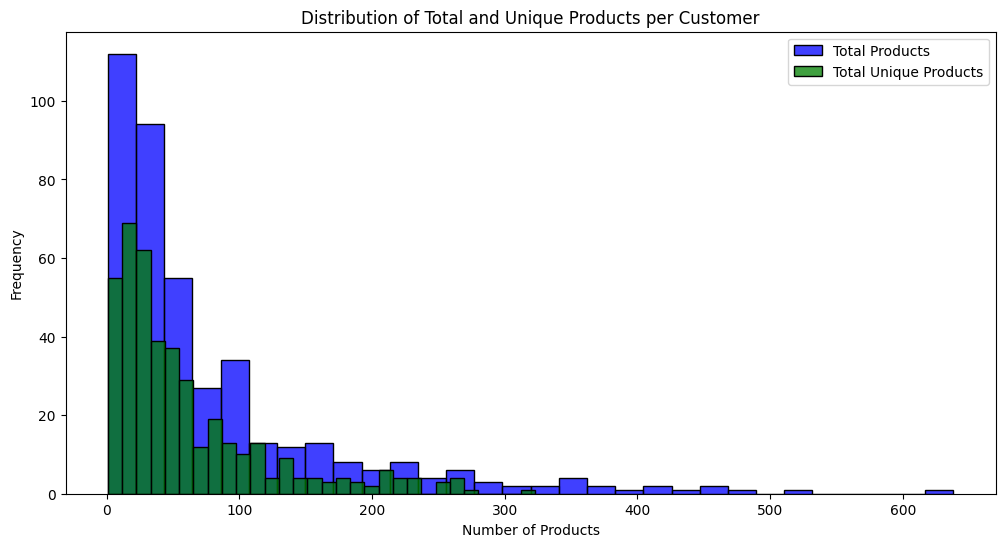

In [23]:
# Plot a bar plot comparing total products and total unique products for each customer
plt.figure(figsize=(12, 6))

# Plotting total products
sns.histplot(product_data['total_products'], color='blue', label='Total Products', kde=False, bins=30)

# Plotting total unique products
sns.histplot(product_data['total_unique_products'], color='green', label='Total Unique Products', kde=False, bins=30)

# Adding labels and title
plt.title('Distribution of Total and Unique Products per Customer')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()



By definition, 'total_unique_products' should always be less than or equal to 'total_products'.

Finally, aggregate sales data by customer. Engineer 2 features:

    'total_sales' - the total sales for each customer.
    'avg_product_value' - the average value of the products purchased by the customer (not the UnitPrice!).



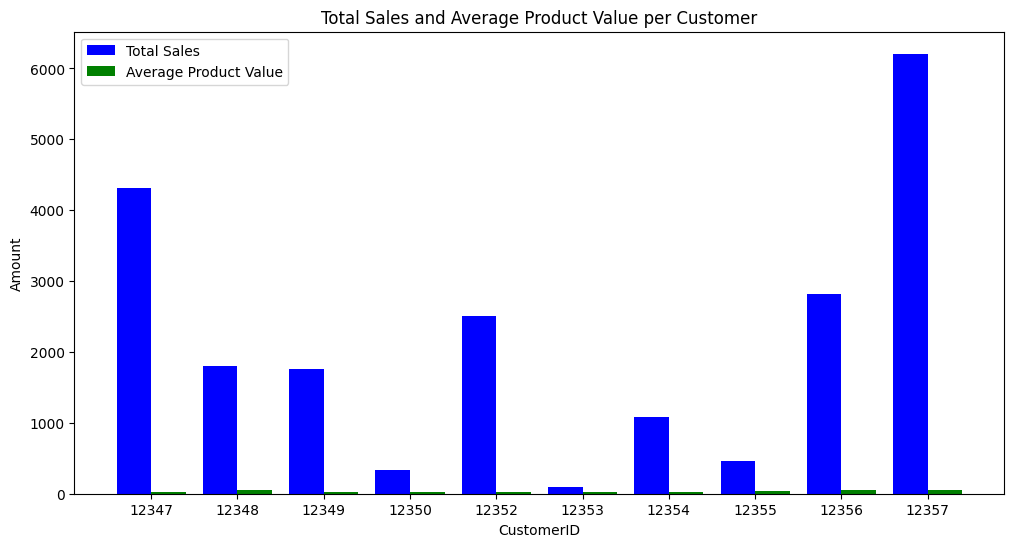

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the DataFrame by 'CustomerID'
# Calculate the total sales and the average product value for each customer
sales_data = df.groupby('CustomerID').agg(
    total_sales=('Sales', 'sum'),
    avg_product_value=('Sales', 'mean')
)

# Select a subset of customers to display for readability (e.g., the first 10 customers)
subset_sales_data = sales_data.head(10)

# Create a bar plot with side-by-side bars for total sales and average product value
plt.figure(figsize=(12, 6))

# Set the bar width
bar_width = 0.4

# Create bar positions
r1 = range(len(subset_sales_data))
r2 = [x + bar_width for x in r1]

# Plot total sales bars
plt.bar(r1, subset_sales_data['total_sales'], width=bar_width, label='Total Sales', color='blue')

# Plot average product value bars
plt.bar(r2, subset_sales_data['avg_product_value'], width=bar_width, label='Average Product Value', color='green')

# Add labels and title
plt.xlabel('CustomerID')
plt.xticks([r + bar_width / 2 for r in range(len(subset_sales_data))], subset_sales_data.index)
plt.ylabel('Amount')
plt.title('Total Sales and Average Product Value per Customer')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [25]:
subset_sales_data.head(10)

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824
12353,89.00,22.250000
12354,1079.40,18.610345
12355,459.40,35.338462
12356,2811.43,47.651356


<b>Intermediary levels</b>

we won't always be able to easily roll up to customer-level directly. Sometimes, it will be easier to create intermediary levels first.

For example, let's say we wanted to calculate the average cart value for each customer.

    'avg_product_value' isn't the same thing because it doesn't first group products that were purchased within the same "cart" (i.e. invoice).

Therefore, let's first aggregate cart data at the "cart-level."

    We'll group by 'CustomerID' AND by 'InvoiceID'. Remember, we're treating each invoice as a "cart."
    Then, we'll calculate 'cart_value' by taking the sum of the Sales column. This is the total sales by invoice (i.e. cart).
    Finally, we'll call .reset_index() to turn CustomerID and InvoiceID back into regular columns so we can perform another aggregation.


# Aggregate Cart-Level Data (Invoice-Level) and Graph

    CustomerID  InvoiceNo  cart_value
0        12347     537626      711.79
1        12347     542237      475.39
2        12347     549222      636.25
3        12347     556201      382.52
4        12347     562032      584.91
5        12347     573511     1294.32
6        12347     581180      224.82
7        12348     539318      892.80
8        12348     541998      227.44
9        12348     548955      367.00
10       12348     568172      310.00
11       12349     577609     1757.55
12       12350     543037      334.40
13       12352     544156      296.50
14       12352     545323      144.35
15       12352     545332      840.30
16       12352     546869      120.33
17       12352     547390      160.33
18       12352     567505      366.25
19       12352     568699      266.25


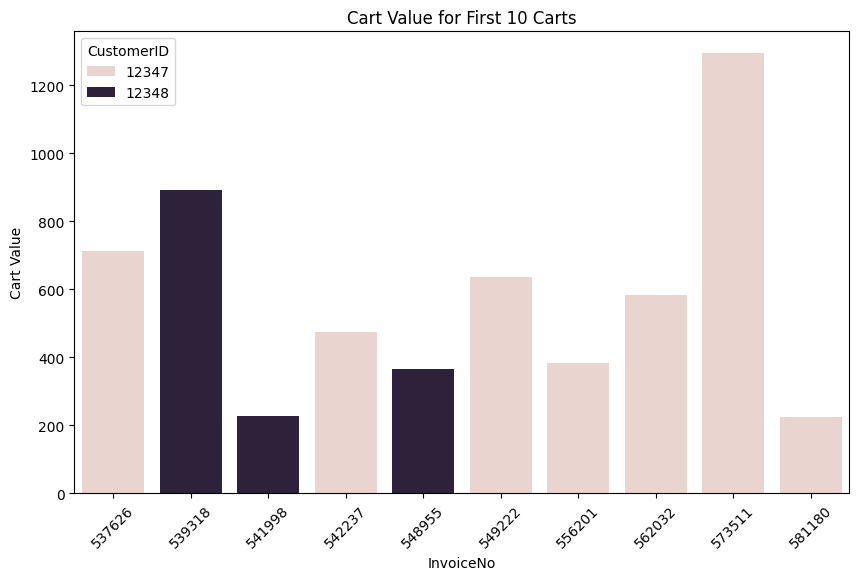

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).agg(cart_value=('Sales', 'sum'))

# Reset index to make 'CustomerID' and 'InvoiceNo' regular columns
cart_data.reset_index(inplace=True)

# Display cart data for first 20 CARTS
print(cart_data.head(20))

# Plot a bar graph to visualize the cart value for the first 10 carts
plt.figure(figsize=(10, 6))
subset_cart_data = cart_data.head(10)
sns.barplot(x=subset_cart_data['InvoiceNo'], y=subset_cart_data['cart_value'], hue=subset_cart_data['CustomerID'], dodge=False)
plt.title('Cart Value for First 10 Carts')
plt.xlabel('InvoiceNo')
plt.ylabel('Cart Value')
plt.xticks(rotation=45)
plt.legend(title='CustomerID')
plt.show()


In [27]:
# Display cart data for first 10 CARTS
print(cart_data.head(10))


   CustomerID  InvoiceNo  cart_value
0       12347     537626      711.79
1       12347     542237      475.39
2       12347     549222      636.25
3       12347     556201      382.52
4       12347     562032      584.91
5       12347     573511     1294.32
6       12347     581180      224.82
7       12348     539318      892.80
8       12348     541998      227.44
9       12348     548955      367.00


# Aggregate Cart Data at Customer-Level and Graph



Now that we have cart-level cart data, all I need to do is roll up by CustomerID again to get customer-level cart data.

Aggregate cart data by customer. Engineer 3 features:

    'avg_cart_value' - average cart value by customer.
    'min_cart_value' - minimum cart value by customer.
    'max_cart_value' - maximum cart value by customer.



            avg_cart_value  min_cart_value  max_cart_value
CustomerID                                                
12347           615.714286          224.82         1294.32
12348           449.310000          227.44          892.80
12349          1757.550000         1757.55         1757.55
12350           334.400000          334.40          334.40
12352           313.255000          120.33          840.30


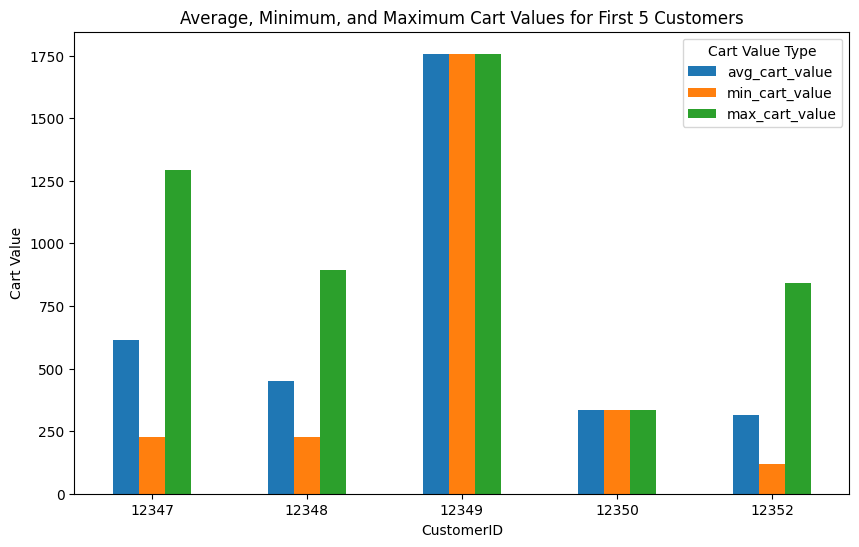

In [28]:
# Aggregate cart data at the customer level
agg_cart_data = cart_data.groupby('CustomerID').agg(
    avg_cart_value=('cart_value', 'mean'),
    min_cart_value=('cart_value', 'min'),
    max_cart_value=('cart_value', 'max')
)

# Display cart data for first 5 CUSTOMERS
print(agg_cart_data.head(5))

# Plot a bar graph to compare average, minimum, and maximum cart values for the first 5 customers
subset_agg_cart_data = agg_cart_data.head(5)

# Create a bar plot for avg, min, and max cart values
subset_agg_cart_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average, Minimum, and Maximum Cart Values for First 5 Customers')
plt.xlabel('CustomerID')
plt.ylabel('Cart Value')
plt.xticks(rotation=0)
plt.legend(title='Cart Value Type')
plt.show()


# Joining various customer level dataframes

I have multiple dataframes that each contain customer-level features:

    invoice_data
    product_data
    sales_data
    agg_cart_data

Let's join the various customer-level datasets together with the .join() function.

    Just pick one of the customer-level dataframes and join it to a list of the others.
    By default, it will join the dataframes on their index... In this case, it will join by CustomerID, which is exactly what we want.
    -> Read .join() function from the official documentation.


In [29]:
customer_df = invoice_data.join(product_data).join(sales_data).join(agg_cart_data)


In [30]:
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [32]:
# Alternate way of join

# # Example using merge, assuming 'customer_id' is the common column
# customer_df = invoice_data.merge(product_data, on='customer_id').merge(sales_data, on='customer_id').merge(agg_cart_data, on='customer_id')

# customer_df.head



Finally, let's save customer_df as our analytical base table to use later.

Very Important: We will not set index=None because we want to keep the CustomerID's as the index.

In [35]:
# Save analytical base table
#customer_df.to_csv('analytical_base_table.csv')

# Curse of Dimensionality.

In [38]:
# mport the cleaned dataset

df = pd.read_csv('cleaned_transactions.csv')


####

####
8.1 So what is "The Curse of Dimensionality?"

"dimensionality" refers to the number of features in your dataset. The basic idea is that as the number of features increases, you'll need more and more observations to build any sort of meaningful model, especially for clustering.

Because cluster models are based on the "distance" between two observations, and distance is calculated by taking the differences between feature values, every observation will seem "far away" from each other if the number of features increases.

The reference link provides an excellent analogy : https://www.quora.com/What-is-the-curse-of-dimensionality

Let's say you have a straight line 100 yards long and you dropped a penny somewhere on it. It wouldn't be too hard to find. You walk along the line and it takes two minutes.

Now let's say you have a square 100 yards on each side and you dropped a penny somewhere on it. It would be pretty hard, like searching across two football fields stuck together. It could take days.

Now a cube 100 yards across. That's like searching a 30-story building the size of a football stadium. Ugh.

The difficulty of searching through the space gets a lot harder as you have more dimensions.

For our practical purposes, it's enough to remember that when you have many features (high dimensionality), it makes clustering especially hard because every observation is "far away" from each other.

The amount of "space" that a data point could potentially exist in becomes larger and larger, and clusters become very hard to form.
8.2 Item Data

So how does The Curse of Dimensionality arise in this problem?

Well, in the previous module, we created a customer-level analytical base table with important features such as total sales by customer and average cart value by customer.

However, remember, the client would also like to to include information about individual items that were purchased.

    For example, if two customers purchased similar items, our model should be more likely to group them into the same cluster.
    In other words, we care not just about how much a customer purchases, but also what they purchase.
    In every observation, along with the data that we have built, we need to include the information of what are the products that are purchased by each customer, i.e. we need to find some way to represent each unique item.

One way is to create a vector of unique values of the StockCode column and if the customer has purchased a particular product, fill it by 1, else fill it by 0.

This is like the binary CountVectorizer technique.


In [39]:
# Get item_dummies - creates the vector of StockCode
item_dummies = pd.get_dummies(df.StockCode)

item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, add 'CustomerID' to this new dataframe so that we can roll up (aggregate) by customer later.

In [40]:
# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df.CustomerID


item_dummies.head()


,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583


Next, roll up the item dummies data into customer-level item data.

In [41]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()


item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5




As you can see, even after rolling up to the customer level, most of the values are still 0. That means that most customers are not buying a huge array of different items, which is to be expected.

Finally, let's display the total number times each item was purchased.


In [42]:
# Total times each item was purchased
item_data.sum()

10002       12
10120        1
10125       13
10133        5
10135        4
          ... 
90202D       1
90204        1
C2           6
M           34
POST      1055
Length: 2574, dtype: int64

###

As you can see, most items were purchased less than a handful of times!

First of all, we've just created 2574 customer-level item features, which leads to The Curse of Dimensionality. To make matters even worse, most of the values for many of those features are 0!

So, we'll introduce a couple of strategies for reducing the number of item features that we actually keep.

Before moving on, let's save this customer-level item dataframe as 'item_data.csv'. I will use it again in the next module.


In [44]:
# Save item_data.csv
#item_data.to_csv('item_data.csv')


8.3 Method 1 - Thresholding

One very simple and straightforward way to reduce the dimensionality of this item data is to set a threshold for keeping features.

    The rationale is that you might only want to keep popular items.
    For example, let's say item A was only purchased by 2 customers. Well, the feature for item A will be 0 for almost all observations, which isn't very helpful.
    On the other hand, let's say item B was purchased by 100 customers. The feature for item B will allow more meaningful comparisons.

To make this concrete, assume we only wish to keep item features for the 20 most popular items.

First, we can see which items those are and the number of times they were purchased.

    Take the sum by column.
    Sort the values.
    Look at the last 20 (since they are sorted in ascending order by default)



In [45]:
# Display most popular 20 items
item_data.sum().sort_values().tail(120)

22847        50
85014B       50
15056BL      50
22748        50
23159        50
           ... 
22556       179
22554       197
22423       222
22326       271
POST       1055
Length: 120, dtype: int64

Next, if we take the .index of the above series, we can get just a list of the StockCodes for those 20 items.

In [46]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(120).index

top_20_items

Index(['22847', '85014B', '15056BL', '22748', '23159', '23231', '23388',
       '22898', '23243', '22966',
       ...
       '21212', '22551', '22629', '22328', '21731', '22556', '22554', '22423',
       '22326', 'POST'],
      dtype='object', length=120)

Finally, we can keep only the features for those 20 items.

In [47]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape


(414, 120)

In [48]:
top_20_item_data.head()

,22847,85014B,15056BL,22748,23159,23231,23388,22898,23243,22966,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2,0,5




These 20 features are much more manageable than the 2574 from earlier, and they are arguably the most important features because they are the most popular items.

Finally, save this top 20 items dataframe as 'threshold_item_data.csv'.


In [51]:
# Save threshold_item_data.csv
#top_20_item_data.to_csv('threshold_item_data.csv')


8.4 PCA

Let's import the full item data that we saved in the previous module (before applying thresholds)

This time, we'll also pass in the argument index_col=0 to tell Pandas to treat the first column (CustomerID) as the index.


In [52]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv', index_col=0)

item_data.shape

(414, 2574)



Principal Component Analysis (PCA) is an Unsupervised Learning task that creates a sequence of new, uncorrelated features that each try to maximize its "explained variance" of the original dataset.

    It does so by generating linear combinations from your original features.
    These new features are meant to replace the original ones.

Here's where dimensionality reduction comes into play, and it's brilliantly simple:

    You don't need to keep all of the principal components!
    You can just keep some number of the "best" components, a.k.a. the ones that explain the most variance.
    Remember, PCA creates a sequence of principal components and each one tries to capture the most variance after accounting for the ones before it.

First, scale item_data, which you imported.


In [54]:
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn
from sklearn.decomposition import PCA

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]


array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])



Next, initialize and fit an instance of the PCA transformation.

Keep all of the components for now (just don't pass in any argument).


In [55]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA()

Finally, generate new "principal component features" from item_data_scaled.

In [56]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00,  4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  7.25728041e-15],
       [-4.21983747e+00,  1.22621722e+00,  1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04,  2.79730636e-15],
       [-1.26084676e+00,  2.38766371e+00,  7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  3.88432745e-15],
       [-4.92931983e+00, -7.14858724e-01,  1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05,  3.39752068e-15],
       [-2.05311348e+00,  2.11095022e+00, -1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04, -2.36725003e-16]])


Explained Variance

It's very helpful to calculate and plot the cumulative explained variance.

    This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
    First, we'll use np.cumsum() to calculate the cumulative explained variance.
    Then, we'll plot it so we can see how many PC features we'd need to keep in order to capture most of the original variance.



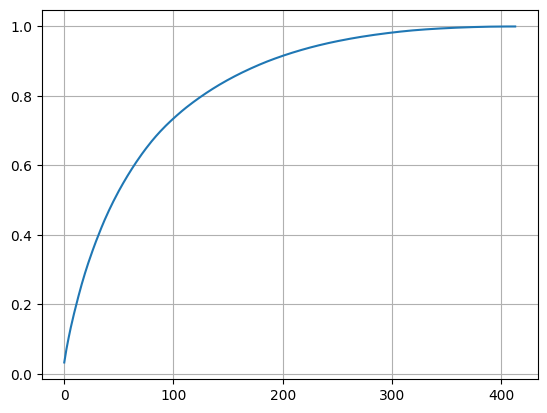

In [57]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.grid()
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)



This chart is saying: To capture about 98% of the variance, we'd need to keep around 300 components.

We can confirm:


In [58]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[300]

np.float64(0.9824241831916602)



Reducing 2574 features down to 300 (about 88% fewer features) while capturing almost 80% of the original variance is certainly not bad!

Initialize and fit another PCA transformation.

    This time, only keep 300 components.
    Generate the principal component features from the fitted instance and name the new matrix PC_items.
    Then, display the shape of PC_items to confirm it only has 300 features.



In [59]:
pca = PCA(n_components=300)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 300)



Next, for convenience, let's put PC_items into a new dataframe.

We'll also name the columns and update its index to be the same as the orginal item_data's index.


In [60]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828917,0.495545,3.093849,-0.633706,11.534092,2.161996,7.116957,5.336009,4.424413,...,0.027603,0.022448,-0.001695,0.087324,-0.115320,-0.075797,0.080960,0.048419,-0.087229,0.040288
12348,-4.219837,1.226217,1.881912,-0.174340,0.817996,-1.160834,-0.871683,-0.846634,0.460240,0.854274,...,0.154528,-0.573910,0.043763,-0.128622,-0.424906,-0.064669,0.708593,0.648201,-2.518620,-0.004929
12349,-1.260847,2.387664,0.073148,-1.119161,-0.034339,3.715390,-0.343602,-0.149045,-0.790001,-0.379234,...,0.539014,-0.228141,-0.130808,-0.108861,-0.191018,-0.725004,-0.216453,-0.326648,0.101572,0.517686
12350,-4.929320,-0.714859,1.580930,-0.469767,-0.116290,-0.647835,0.112904,-1.336313,1.547069,-1.190409,...,1.721496,0.075319,0.187501,-0.301253,0.636055,-1.126521,-1.151147,-1.367122,-0.373536,1.767400
12352,-2.053113,2.110950,-0.184807,0.128240,0.087787,1.943579,2.383307,0.899610,-0.671980,0.081452,...,-0.255746,0.342789,0.009049,0.140931,0.099708,0.116835,-0.094552,-0.112387,-0.225470,-0.042615




    Now we have a dataframe of 300 customer-level principal component features.
    These were generated from the 300 principal components that explained the most variance for the original features.
    The index of this PCA item dataframe contains CustomerID's, which will make it possible for us to join this to our analytical base table.

Finally, save this item dataframe with PCA features as 'pca_item_data.csv'.

    Next, we'll compare the clusters made from using these features against those in 'threshold_item_data.csv'.
    Do not set index=None because we want to keep the CustomerID's as the index.



In [64]:
# Save pca_item_data.csv
#items_pca.to_csv('pca_item_data.csv')


# KMeans Clustering

Let's import 3 CSV files we've saved throughout this project.

    Let's import 'analytical_base_table.csv' as base_df.
    Let's import 'threshold_item_data.csv' as threshold_item_data.
    Let's import 'pca_item_data.csv' as pca_item_data.
    Set index_col=0 for each one to use CustomerID as the index.



In [66]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

In [67]:
print(base_df.head())
print(threshold_item_data.head())
print(pca_item_data.head())

            total_transactions  total_products  total_unique_products  \
CustomerID                                                              
12347                        7             182                    103   
12348                        4              31                     22   
12349                        1              73                     73   
12350                        1              17                     17   
12352                        8              85                     59   

            total_sales  avg_product_value  avg_cart_value  min_cart_value  \
CustomerID                                                                   
12347           4310.00          23.681319      615.714286          224.82   
12348           1797.24          57.975484      449.310000          227.44   
12349           1757.55          24.076027     1757.550000         1757.55   
12350            334.40          19.670588      334.400000          334.40   
12352           2506

In [68]:
print( base_df.shape )
print( threshold_item_data.shape )
print( pca_item_data.shape )

(414, 8)
(414, 120)
(5, 2)




Because K-Means creates clusters based on distances, and because distances are calculated by between observations defined by their feature values, the features you choose to input into the algorithm heavily influence the clusters that are created.

For this project, we will look at 3 possible feature sets and compare the clusters created from them. I will try:

    Only purchase pattern features ("Base DF")
    Purchase pattern features + item features chosen by thresholding ("Threshold DF")
    Purchase pattern features + principal component features from items ("PCA DF")

Create a threshold_df by joining base_df with threshold_item_data.


In [70]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)


threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22847,85014B,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,1,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,0,...,0,0,0,0,1,0,0,2,0,5


Create a pca_df by joining base_df with pca_item_data.

In [71]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)


pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2
CustomerID,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828917
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219837,1.226217
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260847,2.387664
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929320,-0.714859
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053113,2.110950



Number of clusters

So, how many clusters should you set?

    As with much of Unsupervised Learning, there's no right or wrong answer.
    Typically, you should consider how your client/key stakeholder will use the clusters.
    For example, let's say our client, the online gift retailer, employs 3 customer service reps, and they want to assign one cluster to each rep.
    In that case, the obvious answer is 3.
    For this project, we'll set the number of clusters to 3. However, you should always feel free to adapt this number depending on what you need.

First scale both the dataframes


In [72]:
# Initialize instance of StandardScaler
t_scaler = StandardScaler()
p_scaler = StandardScaler()

# Fit and transform
threshold_df_scaled = t_scaler.fit_transform(threshold_df)
pca_df_scaled = p_scaler.fit_transform(pca_df)

In [73]:
# K-Means with threshold_df
t_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)


In [74]:
t_kmeans.fit(threshold_df_scaled)
threshold_df['cluster'] = t_kmeans.fit_predict(threshold_df_scaled)

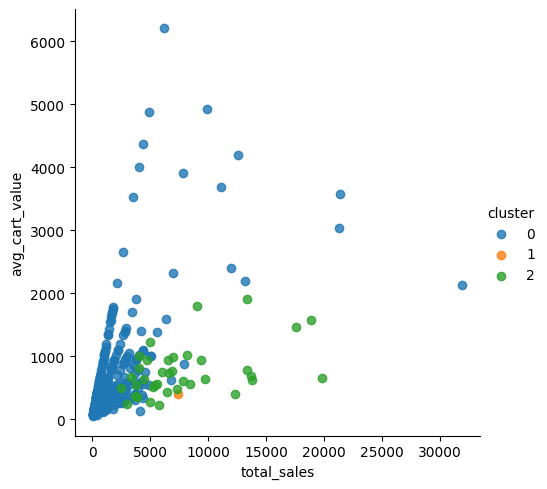

In [75]:
# Scatterplot and colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

In [76]:
# K-Means with pca_df

p_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [79]:
import numpy as np

# Check for NaN values in the numpy array
print(np.isnan(pca_df_scaled).sum())


818


In [83]:
# Check for NaNs column-wise
print(np.isnan(pca_df_scaled).sum(axis=0))


[  0   0   0   0   0   0   0   0 409 409]


In [87]:
# Remove Rows with NaN Values

# # Remove rows with NaN values
# pca_df_scaled_no_nan = pca_df_scaled[~np.isnan(pca_df_scaled).any(axis=1)]


In [88]:
# # Remove Columns with NaN Values

# # Remove columns with NaN values
# pca_df_scaled_no_nan = pca_df_scaled[:, ~np.isnan(pca_df_scaled).any(axis=0)]


In [86]:
#  Impute Missing Values
from sklearn.impute import SimpleImputer

# Impute NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
pca_df_scaled_imputed = imputer.fit_transform(pca_df_scaled)


In [84]:
p_kmeans.fit(pca_df_scaled_imputed)
pca_df['cluster'] = p_kmeans.fit_predict(pca_df_scaled_imputed)


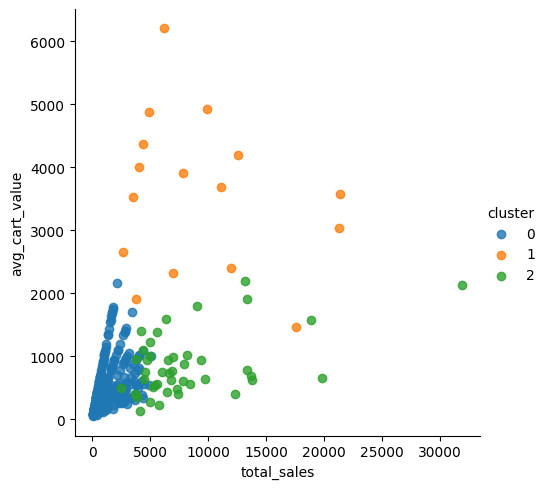

In [85]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

In [90]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(pca_df.cluster, threshold_df.cluster)

0.5610937841396086